<a href="https://www.kaggle.com/code/catherinechengy/amex-prediction-data-project?scriptVersionId=115968870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt, gc, os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet("/kaggle/input/amex-data-integer-dtypes-parquet-format/train.parquet")
test = pd.read_parquet("/kaggle/input/amex-data-integer-dtypes-parquet-format/test.parquet")
train_labels = pd.read_csv("../input/amex-default-prediction/train_labels.csv")
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,...,-1,-1,-1,0,0,0.0,NaN,0,0.006527,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,...,-1,-1,-1,0,0,0.0,NaN,0,0.008126,0


In [3]:
#shapes
train.shape, test.shape, train_labels.shape

((5531451, 190), (11363762, 190), (458913, 2))

In [6]:
#count NaN or missing values in the DataFrame
print('/nCount total NaN at each column in a DataFrame: /n/n',train.isnull().sum())

/nCount total NaN at each column in a DataFrame: /n/n customer_ID          0
S_2                  0
P_2              45985
D_39                 0
B_1                  0
                ...   
D_141           101548
D_142          4587043
D_143                0
D_144            40727
D_145                0
Length: 190, dtype: int64


In [7]:
#Columns that have more than 50% of missing values
columns=train.columns[train.isna().sum()/len(train)*100>50]
columns

Index(['D_42', 'D_50', 'D_53', 'D_56', 'S_9', 'B_17', 'D_73', 'D_76', 'B_29',
       'D_88', 'D_105', 'D_110', 'B_39', 'B_42', 'D_132', 'D_134', 'D_142'],
      dtype='object')

In [8]:
#Drop the columns which have more than 50% of missing values.
train = train.drop(columns, axis=1)
test = test.drop(columns, axis=1)

In [9]:
#lower than 50% but >0
na_rate_s = train.isna().sum()/len(train)*100
na_columns= list(na_rate_s [na_rate_s > 0].index)
na_columns

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_43',
 'D_45',
 'D_46',
 'D_48',
 'B_6',
 'B_8',
 'D_52',
 'P_3',
 'D_54',
 'S_7',
 'D_55',
 'B_13',
 'D_61',
 'B_15',
 'D_62',
 'D_69',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'B_27',
 'R_12',
 'R_14',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_104',
 'B_37',
 'R_27',
 'D_112',
 'B_40',
 'S_27',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_128',
 'D_130',
 'D_131',
 'D_133',
 'D_141',
 'D_144']

In [10]:
#for the lower than 50% but >0 of missing values, we fill with median values.
for column in na_columns:
    fill_value = train[column].mean()
    train[column] = train[column].fillna(fill_value)
train.isna().sum()

customer_ID    0
S_2            0
P_2            0
D_39           0
B_1            0
              ..
D_140          0
D_141          0
D_143          0
D_144          0
D_145          0
Length: 173, dtype: int64

In [11]:
na_rate_s = test.isna().sum()/len(test)*100
na_columns= list(na_rate_s [na_rate_s > 0].index)
na_columns

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_43',
 'D_45',
 'D_46',
 'D_48',
 'B_6',
 'B_8',
 'D_52',
 'P_3',
 'D_54',
 'S_7',
 'D_55',
 'B_13',
 'D_61',
 'B_15',
 'D_62',
 'S_12',
 'D_69',
 'D_77',
 'B_25',
 'B_26',
 'B_27',
 'S_17',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_104',
 'B_37',
 'R_27',
 'D_112',
 'B_40',
 'S_27',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_128',
 'D_130',
 'D_131',
 'D_133',
 'D_141',
 'D_144']

In [12]:
for column in na_columns:
    fill_value = test[column].mean()
    test[column] = test[column].fillna(fill_value)
test.isna().sum()

customer_ID    0
S_2            0
P_2            0
D_39           0
B_1            0
              ..
D_140          0
D_141          0
D_143          0
D_144          0
D_145          0
Length: 173, dtype: int64

In [13]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [14]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [15]:
#shape
train.shape, train_labels.shape, test.shape

((5531451, 174), (458913, 2), (11363762, 174))

In [16]:
import calendar 

In [17]:
import datetime 
def get_last_day(cur_date):
    year = cur_date.year
    month = cur_date.month
    last_day = calendar.monthrange(year,month)[1]
    return datetime.date(year,month,last_day)

In [18]:
#change the column to datetime data type. 
#the original S_2 looks like datetime but actually numbers.

train['S_2'] =pd.to_datetime(train['S_2'])

In [19]:
#to show the datetime of each month_last_date
train['month_last_date'] = train['S_2'].apply(get_last_day)
train.head()

,index,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,month_last_date
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,-1,0,0,0.0,0,0.000610,0,2017-03-31
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,-1,0,0,0.0,0,0.005492,0,2017-04-30
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,-1,0,0,0.0,0,0.006986,0,2017-05-31
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,-1,0,0,0.0,0,0.006527,0,2017-06-30
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,-1,0,0,0.0,0,0.008126,0,2017-07-31


In [20]:
#calculate the number of customer id in each datetime.
customer_last_date_series=train.groupby(by=['customer_ID','month_last_date'])['customer_ID'].count()

#to check if the number of the same customer id exceeds 1. 1 indicates no duplicate customer id each datetime.
customer_last_date_series.sort_values(ascending=False)

customer_ID                                                       month_last_date
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a  2017-03-31         1
aa5ee11132972c48030b6d70bb5581030881c6a719eed89a7d6c2fae7c00b0d5  2018-02-28         1
aa5ee4d6e08edd3785feb1d22a2b743b360048733afe160963d1ea79e28ac0d3  2017-09-30         1
                                                                  2017-08-31         1
                                                                  2017-07-31         1
                                                                                    ..
551332666e152692d055673e6b5c4d91513b9b1b520b59d5536b1cb5d3360641  2017-10-31         1
                                                                  2017-09-30         1
                                                                  2017-08-31         1
                                                                  2017-07-31         1
fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba

In [21]:
#change the data type from series to dateframe using reset_index()
month_customer_df = train.groupby(by='month_last_date')['customer_ID'].count().reset_index()

#change the column name from customer_ID to customer_number
month_customer_df.columns = ['month_last_date','customer_number']
month_customer_df

,month_last_date,customer_number
0,2017-03-31,395630
1,2017-04-30,401556
2,2017-05-31,400306
3,2017-06-30,410384
4,2017-07-31,415602
5,2017-08-31,421099
6,2017-09-30,425455
7,2017-10-31,430292
8,2017-11-30,434268
9,2017-12-31,438910


In [22]:
#merge train and train_labels which shows the target(1 is default,0 is not default)
train = pd.merge(left = train,right=train_labels,how='inner',on='customer_ID')
train.head()

,index,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,month_last_date,target
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,0,0,0.0,0,0.000610,0,2017-03-31,0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,0,0,0.0,0,0.005492,0,2017-04-30,0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,0,0,0.0,0,0.006986,0,2017-05-31,0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,0,0,0.0,0,0.006527,0,2017-06-30,0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,0,0,0.0,0,0.008126,0,2017-07-31,0


In [23]:
train_labels['target'].value_counts()

0    340085
1    118828
Name: target, dtype: int64

In [24]:
#calculate the total number of default in each datetime. 
month_default_df = train[train['target']==1].groupby(by='month_last_date')['customer_ID'].count().reset_index()
month_default_df.columns = ['month_last_date','default_number']
month_default_df.head()

,month_last_date,default_number
0,2017-03-31,91793
1,2017-04-30,94906
2,2017-05-31,95596
3,2017-06-30,99534
4,2017-07-31,102189


In [25]:
#dateframe: number of customer and number of default in each datetime. 
counter_df=pd.merge(left=month_customer_df,right=month_default_df,how ='outer',on='month_last_date')
counter_df

,month_last_date,customer_number,default_number
0,2017-03-31,395630,91793
1,2017-04-30,401556,94906
2,2017-05-31,400306,95596
3,2017-06-30,410384,99534
4,2017-07-31,415602,102189
5,2017-08-31,421099,104782
6,2017-09-30,425455,106784
7,2017-10-31,430292,108795
8,2017-11-30,434268,110607
9,2017-12-31,438910,112520


In [26]:
#calculate the default rate
counter_df['pd_rate'] = counter_df['default_number'] / counter_df['customer_number']
counter_df

,month_last_date,customer_number,default_number,pd_rate
0,2017-03-31,395630,91793,0.232017
1,2017-04-30,401556,94906,0.236346
2,2017-05-31,400306,95596,0.238807
3,2017-06-30,410384,99534,0.242539
4,2017-07-31,415602,102189,0.245882
5,2017-08-31,421099,104782,0.248830
6,2017-09-30,425455,106784,0.250988
7,2017-10-31,430292,108795,0.252840
8,2017-11-30,434268,110607,0.254698
9,2017-12-31,438910,112520,0.256362


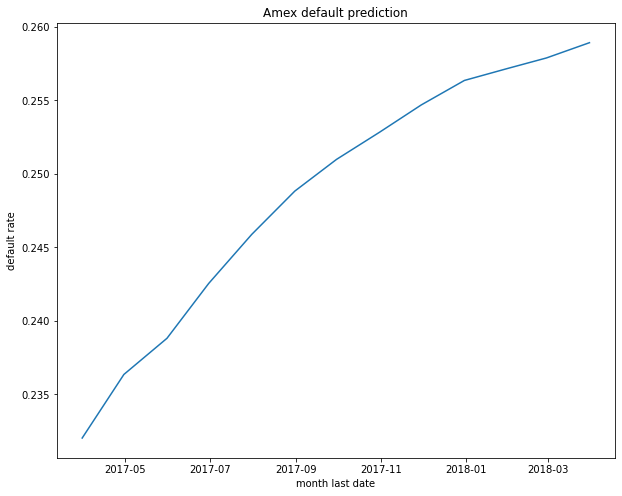

In [27]:
plt.figure(figsize = (10,8))
plt.plot(counter_df['month_last_date'],counter_df['pd_rate'])
plt.xlabel('month last date')
plt.ylabel('default rate')
plt.title('Amex default prediction')
plt.show()

In [28]:
train.head()

,index,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145,month_last_date,target
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,-1,0,0,0.0,0,0.000610,0,2017-03-31,0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,-1,0,0,0.0,0,0.005492,0,2017-04-30,0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,-1,0,0,0.0,0,0.006986,0,2017-05-31,0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,-1,0,0,0.0,0,0.006527,0,2017-06-30,0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,-1,0,0,0.0,0,0.008126,0,2017-07-31,0


In [29]:
# select features
# x is the selected features after dropping unrelated features. y is the predicted target.
X = train.drop(['index','customer_ID','S_2','target','month_last_date'],axis=1)
y = train['target']
X.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_143,D_144,D_145
0,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,0.154414,0,...,-1,-1,-1,-1,0,0,0.0,0,0.000610,0
1,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,0.154414,0,...,-1,-1,-1,-1,0,0,0.0,0,0.005492,0
2,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,0.154414,0,...,-1,-1,-1,-1,0,0,0.0,0,0.006986,0
3,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,0.154414,0,...,-1,-1,-1,-1,0,0,0.0,0,0.006527,0
4,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,0.154414,0,...,-1,-1,-1,-1,0,0,0.0,0,0.008126,0


In [30]:
#build up the logistic regression model with data x and y. 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver='sag').fit(X,y)

In [31]:
#accuracy of the model in train data，actual value y(target). 
clf.score(X,y)

0.8213931570577051

In [32]:
#predict value y(target_predict) of train data
y_pred_train=clf.predict(X)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#add the column of target_predict to train data. 
train_copy=train.copy()
train_copy['target_predict']=y_pred_train
train_copy.head()

,index,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_138,D_139,D_140,D_141,D_143,D_144,D_145,month_last_date,target,target_predict
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,...,-1,0,0,0.0,0,0.000610,0,2017-03-31,0,0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,...,-1,0,0,0.0,0,0.005492,0,2017-04-30,0,0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,...,-1,0,0,0.0,0,0.006986,0,2017-05-31,0,0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,...,-1,0,0,0.0,0,0.006527,0,2017-06-30,0,0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,...,-1,0,0,0.0,0,0.008126,0,2017-07-31,0,0


In [41]:
#calculate the total number of predicted default in each datetime. 
month_default_df_copy = train_copy[train_copy['target_predict']==1].groupby(by='month_last_date')['customer_ID'].count().reset_index()
month_default_df_copy.columns = ['month_last_date','predicted_default_number']
month_default_df_copy.head()

,month_last_date,predicted_default_number
0,2017-03-31,60055
1,2017-04-30,62285
2,2017-05-31,60499
3,2017-06-30,65218
4,2017-07-31,69539


In [42]:
counter_df.head()

,month_last_date,customer_number,default_number_x,pd_rate,default_number_y
0,2017-03-31,395630,91793,0.232017,60055
1,2017-04-30,401556,94906,0.236346,62285
2,2017-05-31,400306,95596,0.238807,60499
3,2017-06-30,410384,99534,0.242539,65218
4,2017-07-31,415602,102189,0.245882,69539


In [43]:
counter_df=pd.merge(left=counter_df,right=month_default_df_copy,how='outer',on='month_last_date')
counter_df

,month_last_date,customer_number,default_number_x,pd_rate,default_number_y,predicted_default_number
0,2017-03-31,395630,91793,0.232017,60055,60055
1,2017-04-30,401556,94906,0.236346,62285,62285
2,2017-05-31,400306,95596,0.238807,60499,60499
3,2017-06-30,410384,99534,0.242539,65218,65218
4,2017-07-31,415602,102189,0.245882,69539,69539
5,2017-08-31,421099,104782,0.248830,74138,74138
6,2017-09-30,425455,106784,0.250988,76114,76114
7,2017-10-31,430292,108795,0.252840,82327,82327
8,2017-11-30,434268,110607,0.254698,87545,87545
9,2017-12-31,438910,112520,0.256362,88402,88402


In [44]:
counter_df['predicted_default_rate']=counter_df['predicted_default_number']/counter_df['customer_number']
counter_df.head()

,month_last_date,customer_number,default_number_x,pd_rate,default_number_y,predicted_default_number,predicted_default_rate
0,2017-03-31,395630,91793,0.232017,60055,60055,0.151796
1,2017-04-30,401556,94906,0.236346,62285,62285,0.155109
2,2017-05-31,400306,95596,0.238807,60499,60499,0.151132
3,2017-06-30,410384,99534,0.242539,65218,65218,0.158919
4,2017-07-31,415602,102189,0.245882,69539,69539,0.167321


In [45]:
#y is actual value, y_pred_train is predcited value
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89   4153582
           1       0.69      0.51      0.59   1377869

    accuracy                           0.82   5531451
   macro avg       0.77      0.72      0.74   5531451
weighted avg       0.81      0.82      0.81   5531451



In [46]:
counter_df

,month_last_date,customer_number,default_number_x,pd_rate,default_number_y,predicted_default_number,predicted_default_rate
0,2017-03-31,395630,91793,0.232017,60055,60055,0.151796
1,2017-04-30,401556,94906,0.236346,62285,62285,0.155109
2,2017-05-31,400306,95596,0.238807,60499,60499,0.151132
3,2017-06-30,410384,99534,0.242539,65218,65218,0.158919
4,2017-07-31,415602,102189,0.245882,69539,69539,0.167321
5,2017-08-31,421099,104782,0.248830,74138,74138,0.176058
6,2017-09-30,425455,106784,0.250988,76114,76114,0.178900
7,2017-10-31,430292,108795,0.252840,82327,82327,0.191328
8,2017-11-30,434268,110607,0.254698,87545,87545,0.201592
9,2017-12-31,438910,112520,0.256362,88402,88402,0.201413


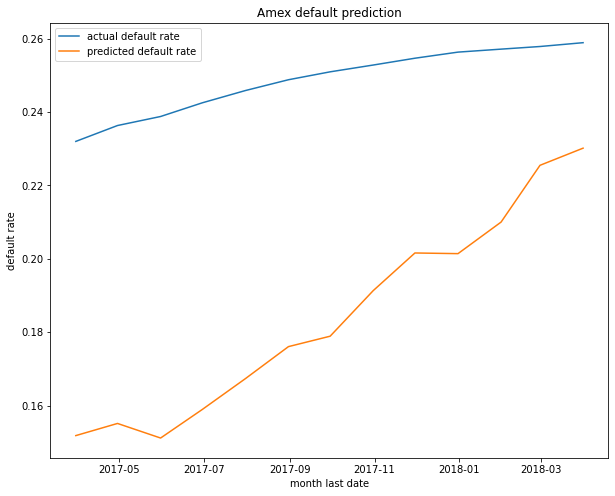

In [48]:
plt.figure(figsize = (10,8))
plt.plot(counter_df['month_last_date'],counter_df['pd_rate'],label='actual default rate')
plt.plot(counter_df['month_last_date'],counter_df['predicted_default_rate'],label='predicted default rate')
plt.legend()#show the labels
plt.xlabel('month last date')
plt.ylabel('default rate')
plt.title('Amex default prediction')
plt.show()

In [49]:
#the importances of features in train data. The coefficient is the importances related to each feature.
#abs represnets the absolute value. 
feature_importances = abs(clf.coef_[0])
feature_importances

array([1.89828593e-02, 2.42937114e-02, 3.90625000e-03, 1.56250000e-02,
       7.81250000e-03, 7.56521383e-03, 3.90625000e-03, 3.39538604e-03,
       5.09254402e-03, 5.33016287e-02, 1.57996994e-02, 8.95765703e-03,
       3.90625000e-03, 3.90625000e-03, 3.90625000e-03, 1.24338418e-02,
       8.15192889e-03, 1.81965921e-02, 3.90625000e-03, 2.63358932e-03,
       2.00169627e-02, 1.68811940e-02, 7.81250000e-03, 7.00425655e-02,
       5.91953751e-03, 9.61698499e-03, 7.81250000e-03, 1.95312500e-03,
       3.81298433e-03, 9.34003480e-03, 1.43379318e-02, 3.32305022e-03,
       7.81250000e-03, 3.90625000e-03, 4.82832169e-04, 3.90625000e-03,
       1.95312500e-03, 7.81250000e-03, 3.90625000e-03, 5.36348321e-04,
       3.35805751e-02, 1.95312500e-03, 7.81250000e-03, 9.76562500e-04,
       1.26881883e-01, 7.81250000e-03, 2.70749032e-02, 1.91033240e-02,
       1.56250000e-02, 5.40085062e-02, 1.56250000e-02, 8.11317842e-03,
       7.81250000e-03, 3.25173512e-02, 1.07015185e-01, 1.95312500e-03,
      

In [ ]:
#dataframe built up with features and importances. 
feature_importance_df= pd.DataFrame(
    {
        "feature":X.columns,"importance":feature_importances
    }
)
feature_importance_df

In [ ]:
#sort the dataframe by descending of importances. 
feature_importance_df = feature_importance_df.sort_values(by='importance',ascending = False)
top10_feature_importance_df=feature_importance_df.head(10)
top10_feature_importance_df

In [ ]:
#plot the dataframe 
import matplotlib.pyplot as plt

plt.bar(top10_feature_importance_df['feature'],top10_feature_importance_df['importance'])
plt.xlabel('feature name')
plt.ylabel('feature importance')
plt.title("feature importance bar")
plt.show()

In [ ]:
#test data
test.head()

In [ ]:
#drop unrelated features of the train data 
test_X =test.drop(['index','customer_ID','S_2'],axis = 1)
test_X

In [ ]:
#predict the target of test data using the model
y_predict =clf.predict(test_X)
y_predict 